# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

# Data loading

In [2]:
df = pd.read_csv('database.csv', sep=',', index_col=0, header=0)

In [3]:
df.head()

,Primaries,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Secondaries,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Tertiaries,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Tailfeathers,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
Species,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN,M,D,Colour of calamus,Colour of rachis (upper),Colour of rachis (under),T,S,Colour of outer vane,Colour of inner vane,Colour of upper vanes,MAX,MIN
Anser anser,5,3,biały,biały,biały,5,2,czarnobrązowy z szarym nalotem,czarnobrązowy z szarą nasadą,brązowoszary,330,220,4,3,biały,biały,biały,4,2,czarnobrązowy z szarą nasadą,czarnobrązowy z szarą nasadą,brązowoszary,220,200,4,1,biały,biały,biały,4,2,czarnobrązowy z szarą nasadą i białożółtą kraw...,czarnobrązowy z szarą nasadą,brązowoszary,220,150,4,2,biały,biały,biały,4,2,szarobrązowy z białym wierzchołkiem,biały z szarą nasadą,jasnoszary,170,140
Tadorna tadorna (adult),5,3,biały,czarny,białoczarny,5,2,czarny,czarny,szaroczarny,270,160,4,3,biały,białoczarny,białoczarny,4,2,czarne z białą nasadą i zieolonym połyskiem,czarnobiałe,szarobiały,170,150,4,1,biały,biały,biały,4,2,biały / czarny / ceglasty,biały,biały / szary,180,100,4,2,biały,biały,biały,4,2,biały z czarnym wąskim wierzchołkiem,biały z czarnym wąskim wierzchołkiem,biały,140,120
Tadorna tadorna (young),5,3,biały,czarnobrązowy,białoczarnobrązowy,5,2,czarnoszare z białawą nasadą / + z białym wier...,czarnoszare z białawą nasadą / + z białym wier...,szaroczarne z białawą nasadą / + z białym wier...,270,160,4,3,biały,biały i czarnobrązowy,biały i czarnobrązowy,4,2,czarnoszare z białym wierzchołkiem,czanoszare z białą nasadą i białym wierzchołkiem,biały / szary,170,150,4,1,biały,szarobrązow / biały,szarobrązow / biały,4,2,biały / brązowoszary z płową krawędzią,biały / szarobrązowy,biały / jasnoszary,180,100,4,2,biały,biały,biały,4,2,biały z ciemnobrązowym wierzchołkiem,biały z ciemnobrązowym wierzchołkiem,biały,140,120
Anas platyrhynchos,5,3,biały,szarobrązowy,szarobrązowy,5,2,szarobrązowe,szarobrązowe z szarą nasadą,szarobrązowy,220,130,4,3,biały,szarobrązowy,szarobrązowy,4,2,czarne z niebieskim połyskiem i białym wierzch...,szarobrązowe,szarobrązowe,140,120,4,1,biały,brązowy,szary,3,3,szare / jasnoszare,szare / jasnoszare,jasnoszary,170,70,4,3,biały,jasnoszary / szary,jasnoszary,3,2,szarobiały / szarobiały z mozaiką,szarobiały / szarobiały z mozaiką,biały / jasnoszary,120,90


### Build 2-level column index

In [4]:
c1 = [x for x in df.columns if 'Unnamed' not in x]
c1

['Primaries', 'Secondaries', 'Tertiaries', 'Tailfeathers']

In [5]:
len(df.columns) / len(c1)

12.0

In [6]:
c2 = df.iloc[0,:12].values
c2

array(['M', 'D', 'Colour of calamus', 'Colour of rachis (upper)',
       'Colour of rachis (under)', 'T', 'S', 'Colour of outer vane',
       'Colour of inner vane', 'Colour of upper vanes', 'MAX', 'MIN'],
      dtype=object)

In [7]:
mi = np.stack(np.meshgrid(c1, c2)).T.reshape(-1,2)
mi.shape

(48, 2)

In [8]:
mi = pd.MultiIndex.from_arrays(mi.T)

In [9]:
df = pd.DataFrame(df.iloc[1:].values, index=df.iloc[1:].index, columns=mi)

In [10]:
df.head()

Primaries                       \
                                M  D Colour of calamus   
Anser anser                     5  3             biały   
Tadorna tadorna (adult)         5  3             biały   
Tadorna tadorna (young)         5  3             biały   
Anas platyrhynchos              5  3             biały   
Anas crecca                     4  3             biały   

                                                                              \
                        Colour of rachis (upper) Colour of rachis (under)  T   
Anser anser                                biały                    biały  5   
Tadorna tadorna (adult)                   czarny              białoczarny  5   
Tadorna tadorna (young)            czarnobrązowy       białoczarnobrązowy  5   
Anas platyrhynchos                  szarobrązowy             szarobrązowy  5   
Anas crecca                                szary                    szary  4   

                                                                               \
                         S                               Colour of outer vane   
Anser anser              2                     czarnobrązowy z szarym nalotem   
Tadorna tadorna (adult)  2                                             czarny   
Tadorna tadorna (young)  2  czarnoszare z białawą nasadą / + z białym wier...   
Anas platyrhynchos       2                                       szarobrązowe   
Anas crecca              2                                        ciemnoszary   

                                                                            \
                                                      Colour of inner vane   
Anser anser                                   czarnobrązowy z szarą nasadą   
Tadorna tadorna (adult)                                             czarny   
Tadorna tadorna (young)  czarnoszare z białawą nasadą / + z białym wier...   
Anas platyrhynchos                             szarobrązowe z szarą nasadą   
Anas crecca                             szary z ciemnoszarym wierzchołkiem   

                                                                            \
                                                     Colour of upper vanes   
Anser anser                                                   brązowoszary   
Tadorna tadorna (adult)                                        szaroczarny   
Tadorna tadorna (young)  szaroczarne z białawą nasadą / + z białym wier...   
Anas platyrhynchos                                            szarobrązowy   
Anas crecca                                                          szary   

                                  Secondaries                       \
                         MAX  MIN           M  D Colour of calamus   
Anser anser              330  220           4  3             biały   
Tadorna tadorna (adult)  270  160           4  3             biały   
Tadorna tadorna (young)  270  160           4  3             biały   
Anas platyrhynchos       220  130           4  3             biały   
Anas crecca              160   90           4  3             biały   

                                                                              \
                        Colour of rachis (upper) Colour of rachis (under)  T   
Anser anser                                biały                    biały  4   
Tadorna tadorna (adult)              białoczarny              białoczarny  4   
Tadorna tadorna (young)    biały i czarnobrązowy    biały i czarnobrązowy  4   
Anas platyrhynchos                  szarobrązowy             szarobrązowy  4   
Anas crecca                                szary                    szary  3   

                                                                               \
                         S                               Colour of outer vane   
Anser anser              2                       czarnobrązowy z szarą nasadą   
Tadorna tadorna (adult)  2        czarne z białą nasadą i zieolonym połyskiem   
Tadorna tadorna (y

# Find NaN

In [11]:
df.isna().sum(axis=1).values

array([ 0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

In [12]:
nan = df.isna().sum(axis=1).values > 0

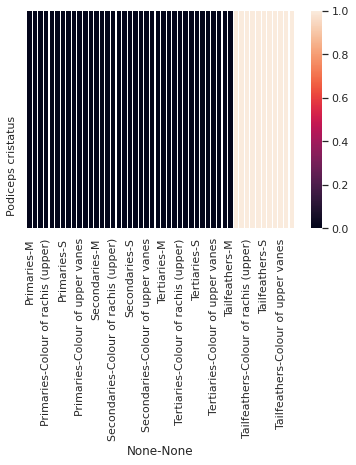

In [14]:
#plt.figure(figsize=(16,10))
sns.heatmap(df[nan].isna(), linewidths=0.1)

# Get sets of unique values

In [15]:
values = {x:df.loc[:,x].unique() for x in df.columns}

In [16]:
flat = {x:set() for x in set([k[1] for k in values])}
for k in values:
    flat[k[1]] = flat[k[1]].union(values[k])

In [17]:
values = pd.DataFrame({k:[flat[k]] for k in flat}).sort_index(axis=1)
values

,Colour of calamus,Colour of inner vane,Colour of outer vane,Colour of rachis (under),Colour of rachis (upper),Colour of upper vanes,D,M,MAX,MIN,S,T
0,"{nan, biała, szarożółty, biały, żółtoszary, sz...",{jasnopopielata z białą nasadą i z 3 czarnymi ...,"{nan, biały / biały z szaroczarnym, czarne z n...","{nan, jasnoszara, czarnoszary, czarnobrązowy, ...","{nan, ciemnoszary, czarnobrązowy, czarnoszary,...","{nan, białe z zarysem czarnobrązowego wierzcho...","{1, nan, 2, 3}","{1, Ten typ piór nie występuje u tego gatunku!...","{110, nan, 310, 410, 300, 350, 200, 150, 90, 4...","{110, nan, 165, 60, 210, 215, 65, 300, 35, 170...","{1, nan, 2, 3}","{1, nan, 2, 5, 3, 4}"


# Translate

In [18]:
keys = set()
for s in values.values.ravel():
    keys = keys.union(s)
keys.remove(np.nan)

In [23]:
# Set to True to show all necessary translations
if False:
    for k in sorted(keys):
        print(f'\'{k}\':,')

In [24]:
translation = {
    'biała':'white',
    'biała do brązowej':'white brown',
    'biała i czarna':'white black',
    'biała i czarnobrązowa':'white black brown',
    'białe':'white',
    'białe w dolnej połowie, czarne w górnej połowie':'white black',
    'białe z zarysem czarnobrązowego wierzchołka i prążków':'white black brown stripes',
    'białe z zarysem prążków':'white stripes',
    'białe, a przy stosinie ciemnobrązowe':'white darkbrown',
    'białe, a przy stosinie ciemnobrązowe / białe, a przy stosinie ciemnobrązowe z jednym - czterema prostymi, ciemniejszymi pręgami':'white darkbrown stripes',
    'białe, a przy stosinie ciemnobrązowe z dwoma - trzema prostymi, ciemniejszymi pręgami':'white darkbrown stripes',
    'białe, a przy stosinie ciemnobrązowe z trzema - czterema prostymi, ciemniejszymi pręgami':'white darkbrown stripes',
    'białe, brązowe przy stosinie i z brązowymi prążkami':'white brown stripes',
    'białe, brązowe przy stosinie i z brązowymi wierzchołkami i brązowymi prążkami':'white brown stripes',
    'białe, brązowe przy stosinie i z brązowymi wierzchołkami i brązowymi prążkami / bez prążków':'white brown stripes',
    'białe, brązowe przy stosinie i z czarnobrązowymi wierzchołkami i brązowymi prążkami':'white brown black stripes',
    'białe, brązowe przy stosinie i z czarnobrązowymi wierzchołkami i brązowymi prążkami / bez prążków':'white brown black stripes',
    'białei z brązowymi wierzchołkami i zarysem prążków':'white brown weak-stripes',
    'białei z czarnobrązowymi wierzchołkami i zarysem prążków':'white black brown weak-stripes',
    'białoczarnobrązowy':'white black brown',
    'białoczarny':'white black',
    'białoróżowe':'white pink',
    'białoszary':'white grey',
    'biały':'white',
    'biały / biały z szaroczarnym':'white grey black',
    'biały / brązowoszary z płową krawędzią':'white brown grey',
    'biały / czarny / ceglasty':'white black orange',
    'biały / jasnoszary':'white lightgrey',
    'biały / szarobrązowy':'white grey brown',
    'biały / szary':'white grey',
    'biały do jasnoszarego':'white lightgrey',
    'biały i czarnobrązowy':'white black brown',
    'biały i czarny':'white black',
    'biały i szaroczarny':'white grey black',
    'biały i szary':'white grey',
    'biały z ciemnobrązowym wierzchołkiem':'white darkbrown',
    'biały z czarnym wąskim wierzchołkiem':'white black',
    'biały z szarą nasadą':'white grey',
    'biały, szary i czarny':'white grey black',
    'brązowe do białych, z brązowymi prążkami':'brown white stripes',
    'brązowe do białych, z czarnobrązowym, szerokim wierzchołkiem i czasami z brązowymi prążkami':'brown white black brown stripes',
    'brązowe z czanobrązowymi wierzchołkami, czasem z ciemniejszymi prążkami':'brown black brown stripes',
    'brązowe, czasem z ciemniejszymi prążkami':'brown stripes',
    'brązowoszary':'brown grey',
    'brązowy':'brown',
    'ciemnobrązowe':'darkbrown',
    'ciemnoszare':'darkgrey',
    'ciemnoszare / ciemnoszare z białą krawędzią':'darkgrey white',
    'ciemnoszare z białą krawędzią':'darkgrey white',
    'ciemnoszary':'darkgrey',
    'ciemnoszary z białą krawędzią':'darkgrey white',
    'czanoszare z białą nasadą i białym wierzchołkiem':'black grey white',
    'czanoszary':'black grey',
    'czarna':'black',
    'czarne':'black',
    'czarne / czarne z białą nasadą':'black white',
    'czarne z białym wierzchołkiem / + z zielonym połyskiem':'black white glossy',
    'czarne z białą nasadą i zieolonym połyskiem':'black white glossy',
    'czarne z niebieskim połyskiem i białym wierzchołkiem':'black white glossy',
    'czarnobiałe':'white black',
    'czarnobiały':'black white',
    'czarnobrązowa':'black brown',
    'czarnobrązowe':'black brown',
    'czarnobrązowe / czarnobrązowe z kilkoma brązowymi pręgami na środku i czarnym wierzchołkiem':'black brown stripes',
    'czarnobrązowe z kilkoma brązowymi pręgami na środku i czarnym wierzchołkiem':'black brown stripes',
    'czarnobrązowy':'black brown',
    'czarnobrązowy z szarym nalotem':'black brown grey',
    'czarnobrązowy z szarą nasadą':'black brown grey',
    'czarnobrązowy z szarą nasadą i białożółtą krawędzią':'black brown grey white yellow',
    'czarnobrązowy z zielonym i fioletowym połyskiem':'black brown glossy',
    'czarnobrązowy z zielonym połyskiem':'black brown glossy',
    'czarnoszara':'black grey',
    'czarnoszare':'black grey',
    'czarnoszare z białawą nasadą / + z białym wierzchołkiem':'black grey white',
    'czarnoszare z białym wierzchołkiem':'black grey white',
    'czarnoszary':'black grey',
    'czarnoszary z popielatym nalotem':'black grey',
    'czarny':'black',
    'czarny / czarnobrązowy':'black brown',
    'czarny / czarnobrązowy z małą białą nasadą':'black brown white',
    'czarny / czarnobrązowy, z jasnoszarą nasadą':'black brown lightgrey',
    'czarny / czarny z białym nalotem':'black white',
    'czarny / czarny z niebieskim połyskiem':'black glossy',
    'czarny z małą białą nasadą':'black white',
    'czarny z niebieskim połyskiem':'black glossy',
    'jasnoszara z ciemnoszarym wierzchołkiem':'lightgrey darkgrey',
    'jasnoszare i ciemnoszare przy wierzchołku':'lightgrey darkgrey',
    'jasnoszare z ciemnioszarym wierzchołkiem':'lightgrey darkgrey',
    'jasnoszary':'lightgrey',
    'jasnoszary / szary':'lightgrey grey',
    'jasnoszary u nasady, szary, ciemnoszary, czarny wierzchołek, pióro postrzępione':'lightgrey grey darkgrey black ragged',
    'jasnoszary z jasną nasadą':'lightgrey',
    'jasnoszary z jasną nasadą i białym wierzchołkiem':'lightgrey white',
    'szara':'grey',
    'szara / ciemnoszara':'grey darkgrey',
    'szara z ciemnoszarym wierzchołkiem':'grey darkgrey',
    'szare':'grey',
    'szare / jasnoszare':'grey lightgrey',
    'szarobiały':'grey white',
    'szarobiały / szarobiały z mozaiką':'lightgrey grey white',
    'szarobrązow / biały':'grey brown white',
    'szarobrązowe':'grey brown',
    'szarobrązowe z szarą nasadą':'grey brown',
    'szarobrązowy':'grey brown',
    'szarobrązowy z białym wierzchołkiem':'grey brown white',
    'szaroczarne':'grey black',
    'szaroczarne z białawą nasadą / + z białym wierzchołkiem':'grey black white',
    'szaroczarne z białymi nasadami':'grey black white',
    'szaroczarny':'grey black',
    'szarożółty':'grey yellow',
    'szary':'grey',
    'szary / ciemnoszary':'grey darkgrey',
    'szary i czarnoszary':'grey black',
    'szary z białą nasadą':'grey white',
    'szary z ciemnoszarym wierzchołkiem':'grey darkgrey',
    'szary z mozaiką na krawędzi / szary z czarnobiałą krawędzią':'grey black white',
    'szary, od górnej połowy czarny / czarnobrązowy':'grey black brown',
    'żółtobrązowy':'yellow brown',
    'żółtoszary':'yellow grey',
    'białe z 5 szerokimi czarnobrązowymi pręgami':'white black brown wide-stripes',
    'białe z brązowym prążkowaniem':'white brown stripes',
    'białe z niewyraźnym brązowym prążkowaniem':'white brown weak-stripes',
    'białe z szarym wierzchołkiek i brązowymi prążkami':'white grey brown stripes',
    'białe ze słabym prążkowaniem':'white weak-stripes',
    'białobrązowy':'white brown',
    'brązowa / ze śladem prążkowania':'brown weak-stripes',
    'brązowe / jasnożółte, z 5 szerokimi brązowymi pręgami':'brown lightyellow brown wide-stripes',
    'ciemnobrązowa':'darkbrown',
    'ciemnobrązowa / ze śladem prążkowania':'darkbrown weak-stripes',
    'ciemnobrązowa przy wierzchołku, jasnożółta przy nasadzie, z szerokimi wyraźnymi ciemnobrązowymi pręgami':'darkbrown lightyellow wide-stripes',
    'ciemnobrązowa z jasnożółtym rozjaśnieniem nasady, z 2/3 szerokimi ciemnobrązowymi pręgami':'darkbrown lightyellow wide-stripes',
    'ciemnobrązowy':'darkbrown',
    'ciemnoszare do czarnych z białym pasem na środku w poprzek pióra':'darkgrey black white',
    'ciemnoszare z szerokim czarnym końcem i szarym pasem na środku w poprzek pióra':'darkgrey grey',
    'czarna / jasnopopielata z czarnymi pręgami':'black lightgris black stripes',
    'czarna / popielata':'black gris',
    'czarna / popielata z białą nasadą i z trzema czarnymi, szerokimi pręgami':'black gris white wide-stripes',
    'czarnoszara / szara':'black grey',
    'jasnobrązowe z białym w tle i z niewyraźnymi ciemnobrązowymi prążkami':'lightbrown white darkbrown weak-stripes',
    'jasnobrązowe z białą nasadą i z wyraźnymi ciemnobrązowymi prążkami':'lightbrown white darkbrown stripes',
    'jasnobrązowe z niewyraźnymi ciemnobrązowymi prążkami':'lightbrown darkbrown weak-stripes',
    'jasnobrązowe z wyraźnymi ciemnobrązowymi prążkami':'lightbrown darkbrown stripes',
    'jasnobrązowe z wyraźnymi, ciemnobrązowymi pręgami':'lightbrown darkbrown stripes',
    'jasnobrązowy':'lightbrown',
    'jasnopomarańczowe / białe z szarymi wierzchołkami i brązowymi prążkami':'lightorange white grey brown stripes',
    'jasnopomarańczowe z szarymi wierzchołkami i szarymi / brązowymi prążkami':'lightorange grey brown stripes',
    'jasnopomarańczowy z szarymi prążkami':'lightorange grey stripes',
    'jasnopopielata z białą nasadą i z 3 czarnymi szerokimi pręgami':'lightgris white wide-stripes',
    'jasnopopielata z czarnymi pręgami':'lightgris black stripes',
    'jasnopopielaty / ze śladem czarnych prążków':'lightgris black weak-stripes',
    'jasnoszara':'lightgrey',
    'jasnoszara z ciemnoszarym prążkowaniem':'lightgrey darkgrey stripes',
    'jasnoszara z czarnoszarym wierzchołkiem':'lightgrey black grey',
    'jasnoszara z gęstym prążkowaniem':'lightgrey stripes',
    'jasnoszara z gęstym, wyraźniejszym prążkowaniem':'lightgrey stripes',
    'jasnoszara z niewyraźnym, szarym prążkowaniem':'lightgrey weak-stripes',
    'jasnoszare z ciemnoszarym wierzchołkiem':'lightgrey darkgrey',
    'jasnoszare z wyraźnymi ciemnobrązowymi prążkami':'lightgrey darkbrown stripes',
    'jasnoszare z wyraźnymi ciemnoszarymi prążkami':'lightgrey darkgrey stripes',
    'jasnożółte z 5 szerokimi brązowymi pręgami':'lightyellow brown wide-stripes',
    'jasnożółte z wyraźnymi, ciemnobrązowymi prążkami':'lightyellow darkbrown stripes',
    'jasnożółte z wyraźnymi, ciemnobrązowymi pręgami':'lightyellow darkbrown stripes',
    'mozaikowato szare z pomarańczowym tłem i białą nasadą':'grey orange white',
    'popielata (jasnoszara) z ciemnoszarym wierzchołkiem':'gris lightgrey darkgrey',
    'popielata z 2 czarnymi, szerokimi pręgami':'gris black wide-stripes',
    'popielate / białe z 5 szerokimi czarnobrązowymi pręgami':'gris white black brown wide-stripes',
    'popielaty / ze śladem czarnych prążków':'gris black weak-stripes',
    'stalowoszara':'grey',
    'stalowoszara / z jasnoszarym tłem / z szerokim, niewyraźnym prążkowaniem':'grey lightgrey weak-stripes wide-stripes',
    'stalowoszara / z szerokim, niewyraźnym prążkowaniem':'grey wide-stripes weak-stripes',
    'stalowoszara do białej z wyraźnymi, szarymi prążkami':'grey white stripes',
    'stalowoszara do białej z zanikającymi szarymi prążkami':'grey white weak-stripes',
    'stalowoszara z jasnoszarą nasadą, z gęstym, rozmytym prążkowaniem':'grey lightgrey stripes',
    'stalowoszara z niewyraźnym, gęstym prążkowaniem':'grey weak-stripes',
    'szara z ciemnoszarym prążkowaniem':'grey darkgrey stripes',
    'szara z czarnoszarym wierzchołkiem':'grey black',
    'szara z dużą, czarnoszarą plamą':'grey black',
    'szare z czarnym paskiem przy wierzchołku':'grey black',
    'szarobrązowa':'grey brown',
    'szarobrązowa do białej z wyraźnymi, ciemnobrązowymi prążkami':'grey brown white darkbrown stripes',
    'szarobrązowa do białej z zanikającymi ciemnobrązowymi prążkami':'grey brown white darkbrown weak-stripes',
    'szaroczarna':'grey black',
    'szarożółte do jasnożółtych z niewyraźnymi prążkami':'grey yellow lightyellow weak-stripes',
    'szarożółte do jasnożółtych z wyraźnymi, brązowymi prążkami':'grey yellow lightyellow brown stripes',
    'szarożółte z niewyraźnymi prążkami':'grey yellow weak-stripes',
    'żółtopomarańczowe przechodzące w jasnobrązowe z gęstymi cienkimi, brązowymi prążkami, dużo bieli u nasady':'yellow orange lightbrown brown white stripes',
    'żółtopomarańczowe przechodzące w jasnobrązowe z wyraźnymi, brązowymi prążkami':'yellow orange lightbrown brown stripes',
    'żółtopomarańczowe przechodzące w jasnobrązowe z wyraźnymi, brązowymi prążkami, białe u nasady':'yellow orange lightbrown brown white stripes',
    'żółtopomarańczowe przechodzące w jasnobrązową mozaikę z gęstymi cienkimi, brązowymi prążkami':'yellow orange lightbrown brown stripes',
    'żółtopomarańczowe przechodzące w jasnobrązową mozaikę z gęstymi cienkimi, brązowymi prążkami i białą nasadą':'yellow orange lightbrown brown white stripes',
    'żółtopomarańczowe przechodzące w jasnobrązową mozaikę z wyraźnymi, brązowymi prążkami':'yellow orange lightbrown brown stripes'
}

### Missing keys

In [25]:
for k in sorted(keys):
    if k not in translation:
        print(k)

1
100
110
115
120
130
135
140
150
160
165
170
180
2
200
210
215
220
230
240
250
260
270
280
290
3
300
310
320
330
340
35
350
360
370
380
390
4
40
400
410
450
490
5
50
500
560
570
60
64
65
70
75
80
90
Ten typ piór nie występuje u tego gatunku!


### Create translated dataset

In [29]:
# remove the comment
df.loc['Podiceps cristatus', pd.IndexSlice['Tailfeathers','M']] = np.nan

In [31]:
df_t = df.applymap(lambda x: translation[x] if x in translation else x)
df_t

Primaries                       \
                                      M  D Colour of calamus   
Anser anser                           5  3             white   
Tadorna tadorna (adult)               5  3             white   
Tadorna tadorna (young)               5  3             white   
Anas platyrhynchos                    5  3             white   
Anas crecca                           4  3             white   
Podiceps cristatus                    4  2        grey brown   
Phalacrocorax carbo                   4  3       yellow grey   
Plegadis falcinellus                  4  2             brown   
Phoenicopterus roseus                 5  3       grey yellow   
Ciconia ciconia                       5  2             white   
Grus grus                             5  3     grey darkgrey   
Ardea cinerea                         4  2             white   
Nycticorax nycticorax (young)         4  2             white   
Nycticorax nycticorax (adult)         4  2             white   
Egretta garzetta                      4  2             white   
Columba livia f. urbana               5  2             white   
Columba palumbus                      5  2             white   
Aquila chrysaetos (adult)             5  2             white   
Aquila chrysaetos (young)             5  2             white   
Circaetus gallicus (young)            5  3             white   
Circaetus gallicus (adult)            5  3             white   
Buteo buteo (young)                   3  2             white   
Buteo buteo (adult)                   3  2             white   
Circus pygargus (male)                3  2             white   
Circus pygargus (female)              3  2             white   
Accipiter gentilis (young)            4  2             white   
Accipiter gentilis (adult)            4  2             white   
Accipiter nisus (male)                3  1             white   
Accipiter nisus (female)              3  1             white   
Tyto alba                             3  2             white   
Asio otus                             3  2             white   
Strix aluco                           3  2             white   
Corvus monedula                       2  2             white   
Corvus corone                         2  2             white   
Corvus corax                          3  2             white   

                                                        \
                              Colour of rachis (upper)   
Anser anser                                      white   
Tadorna tadorna (adult)                          black   
Tadorna tadorna (young)                    black brown   
Anas platyrhynchos                          grey brown   
Anas crecca                                       grey   
Podiceps cristatus                               black   
Phalacrocorax carbo                              black   
Plegadis falcinellus                       black brown   
Phoenicopterus roseus                            black   
Ciconia ciconia                            white black   
Grus grus                                        black   
Ardea cinerea                               black grey   
Nycticorax nycticorax (young)                lightgrey   
Nycticorax nycticorax (adult)                lightgrey   
Egretta garzetta                                 white   
Columba livia f. urbana                     black grey   
Columba palumbus                            black grey   
Aquila chrysaetos (adult)                  black brown   
Aquila chrysaetos (young)                  white black   
Circaetus gallicus (young)                       white   
Circaetus gallicus (adult)                       white   
Buteo buteo (young)                        white brown   
Buteo buteo (adult)                        white brown   
Circus pygargus (male)                           black   
Circus pygargus (female)                     darkbrown   
Accipiter gentilis (young)                  grey black   
Accipiter gentilis (adult)           

# Find similar

In [32]:
df_sorted = df_t.sort_values(list(df_t.columns)).dropna()
df_sorted

Primaries                       \
                                      M  D Colour of calamus   
Corvus monedula                       2  2             white   
Corvus corone                         2  2             white   
Accipiter nisus (male)                3  1             white   
Accipiter nisus (female)              3  1             white   
Corvus corax                          3  2             white   
Circus pygargus (male)                3  2             white   
Strix aluco                           3  2             white   
Asio otus                             3  2             white   
Circus pygargus (female)              3  2             white   
Tyto alba                             3  2             white   
Buteo buteo (young)                   3  2             white   
Buteo buteo (adult)                   3  2             white   
Plegadis falcinellus                  4  2             brown   
Ardea cinerea                         4  2             white   
Accipiter gentilis (adult)            4  2             white   
Accipiter gentilis (young)            4  2             white   
Nycticorax nycticorax (adult)         4  2             white   
Nycticorax nycticorax (young)         4  2             white   
Egretta garzetta                      4  2             white   
Anas crecca                           4  3             white   
Phalacrocorax carbo                   4  3       yellow grey   
Aquila chrysaetos (adult)             5  2             white   
Columba palumbus                      5  2             white   
Columba livia f. urbana               5  2             white   
Ciconia ciconia                       5  2             white   
Aquila chrysaetos (young)             5  2             white   
Grus grus                             5  3     grey darkgrey   
Phoenicopterus roseus                 5  3       grey yellow   
Tadorna tadorna (adult)               5  3             white   
Tadorna tadorna (young)               5  3             white   
Anas platyrhynchos                    5  3             white   
Circaetus gallicus (adult)            5  3             white   
Circaetus gallicus (young)            5  3             white   
Anser anser                           5  3             white   

                                                        \
                              Colour of rachis (upper)   
Corvus monedula                                  black   
Corvus corone                                    black   
Accipiter nisus (male)                      grey black   
Accipiter nisus (female)                    grey black   
Corvus corax                                     black   
Circus pygargus (male)                           black   
Strix aluco                                black brown   
Asio otus                                        brown   
Circus pygargus (female)                     darkbrown   
Tyto alba                                   lightbrown   
Buteo buteo (young)                        white brown   
Buteo buteo (adult)                        white brown   
Plegadis falcinellus                       black brown   
Ardea cinerea                               black grey   
Accipiter gentilis (adult)                  grey black   
Accipiter gentilis (young)                  grey black   
Nycticorax nycticorax (adult)                lightgrey   
Nycticorax nycticorax (young)                lightgrey   
Egretta garzetta                                 white   
Anas crecca                                       grey   
Phalacrocorax carbo                              black   
Aquila chrysaetos (adult)                  black brown   
Columba palumbus                            black grey   
Columba livia f. urbana                     black grey   
Ciconia ciconia                            white black   
Aquila chrysaetos (young)                  white black   
Grus grus                                        black   
Phoenicopterus roseus                      

In [33]:
sim = []
for i in range(1,len(df_sorted)):
    sim.append({
        'name':df_sorted.iloc[i-1].name+' - '+df_sorted.iloc[i].name,
        'v':df_sorted.iloc[i-1:i+1].apply(lambda x: (x.values == x[0]).sum()).sum() / 96
    })

In [34]:
pd.DataFrame(sim).set_index('name').sort_values(by='v', ascending=False)

,v
name,
Circaetus gallicus (adult) - Circaetus gallicus (young),0.958333
Corvus monedula - Corvus corone,0.916667
Buteo buteo (young) - Buteo buteo (adult),0.895833
Accipiter gentilis (adult) - Accipiter gentilis (young),0.875000
Nycticorax nycticorax (adult) - Nycticorax nycticorax (young),0.875000
Tadorna tadorna (adult) - Tadorna tadorna (young),0.822917
Accipiter nisus (male) - Accipiter nisus (female),0.791667
Columba palumbus - Columba livia f. urbana,0.791667
Strix aluco - Asio otus,0.770833


In [35]:
df.loc[['Circaetus gallicus (adult)','Circaetus gallicus (young)']]

Primaries                       \
                                   M  D Colour of calamus   
Circaetus gallicus (adult)         5  3             biała   
Circaetus gallicus (young)         5  3             biała   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    biała                    biała   
Circaetus gallicus (young)                    biała                    biała   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  4  3        czarnobrązowe   
Circaetus gallicus (young)  4  3        czarnobrązowe   

                                                                               \
                                                         Colour of inner vane   
Circaetus gallicus (adult)               białe, a przy stosinie ciemnobrązowe   
Circaetus gallicus (young)  białe, a przy stosinie ciemnobrązowe / białe, ...   

                                                           Secondaries     \
                           Colour of upper vanes  MAX  MIN           M  D   
Circaetus gallicus (adult)                 białe  490  280           4  2   
Circaetus gallicus (young)                 białe  490  280           4  2   

                                                                       \
                           Colour of calamus Colour of rachis (upper)   
Circaetus gallicus (adult)             biała                    biała   
Circaetus gallicus (young)             biała                    biała   

                                                           \
                           Colour of rachis (under)  T  S   
Circaetus gallicus (adult)                    biała  3  3   
Circaetus gallicus (young)                    biała  3  3   

                                                 \
                           Colour of outer vane   
Circaetus gallicus (adult)        ciemnobrązowe   
Circaetus gallicus (young)        ciemnobrązowe   

                                                                               \
                                                         Colour of inner vane   
Circaetus gallicus (adult)               białe, a przy stosinie ciemnobrązowe   
Circaetus gallicus (young)  białe, a przy stosinie ciemnobrązowe z trzema ...   

                                                           Tertiaries     \
                           Colour of upper vanes  MAX  MIN          M  D   
Circaetus gallicus (adult)                 białe  320  250          3  1   
Circaetus gallicus (young)                 białe  320  250          3  1   

                                                                       \
                           Colour of calamus Colour of rachis (upper)   
Circaetus gallicus (adult)             biała                    biała   
Circaetus gallicus (young)             biała                    biała   

                                                           \
                           Colour of rachis (under)  T  S   
Circaetus gallicus (adult)                    biała  2  3   
Circaetus gallicus (young)                    biała  2  3   

                                                 \
                           Colour of outer vane   
Circaetus gallicus (adult)        ciemnobrązowe   
Circaetus gallicus (young)        ciemnobrązowe   

                                                                               \
                                                         Colour of inner vane   
Circaetus gallicus (adult)               białe, a przy stosinie ciemnobrązowe   
Circaetus gallicus (young)  białe, a przy stosinie ciemnobrązowe z dwoma -...   

                                                           Tailfeathers     \
                           Colour of upper vanes  MAX  MIN            M  D   
C

In [36]:
df_t.loc[['Circaetus gallicus (adult)','Circaetus gallicus (young)']]

Primaries                       \
                                   M  D Colour of calamus   
Circaetus gallicus (adult)         5  3             white   
Circaetus gallicus (young)         5  3             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  4  3          black brown   
Circaetus gallicus (young)  4  3          black brown   

                                                                           \
                               Colour of inner vane Colour of upper vanes   
Circaetus gallicus (adult)          white darkbrown                 white   
Circaetus gallicus (young)  white darkbrown stripes                 white   

                                     Secondaries                       \
                            MAX  MIN           M  D Colour of calamus   
Circaetus gallicus (adult)  490  280           4  2             white   
Circaetus gallicus (young)  490  280           4  2             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  3  3            darkbrown   
Circaetus gallicus (young)  3  3            darkbrown   

                                                                           \
                               Colour of inner vane Colour of upper vanes   
Circaetus gallicus (adult)          white darkbrown                 white   
Circaetus gallicus (young)  white darkbrown stripes                 white   

                                     Tertiaries                       \
                            MAX  MIN          M  D Colour of calamus   
Circaetus gallicus (adult)  320  250          3  1             white   
Circaetus gallicus (young)  320  250          3  1             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

                                                       \
                            T  S Colour of outer vane   
Circaetus gallicus (adult)  2  3            darkbrown   
Circaetus gallicus (young)  2  3            darkbrown   

                                                                           \
                               Colour of inner vane Colour of upper vanes   
Circaetus gallicus (adult)          white darkbrown                 white   
Circaetus gallicus (young)  white darkbrown stripes                 white   

                                     Tailfeathers                       \
                            MAX  MIN            M  D Colour of calamus   
Circaetus gallicus (adult)  250  200            3  2             white   
Circaetus gallicus (young)  250  200            3  2             white   

                                                                              \
                           Colour of rachis (upper) Colour of rachis (under)   
Circaetus gallicus (adult)                    white                    white   
Circaetus gallicus (young)                    white                    white   

     

# Obtain domains

In [37]:
df.loc[:,pd.IndexSlice[:,['MIN','MAX']]].astype(np.float).min().min()

35.0

In [38]:
df.loc[:,pd.IndexSlice[:,['MIN','MAX']]].astype(np.float).max().max()

570.0

In [39]:
text_cols = ['Colour of calamus',
             'Colour of inner vane',
             'Colour of outer vane',
             'Colour of rachis (under)',
             'Colour of rachis (upper)',
             'Colour of upper vanes']

In [40]:
values_t = {x:df_t.loc[:,x].unique().astype(str) for x in df_t.columns}

In [41]:
flat = {x:set() for x in set([k[1] for k in values_t])}
for k in values_t:
    if k[1] in text_cols:
        l = []
        for x in values_t[k]:
            l += x.split(' ')
        flat[k[1]] = flat[k[1]].union(l)
    else:
        flat[k[1]] = flat[k[1]].union(values_t[k])

In [42]:
values_t = pd.DataFrame({k:[flat[k]] for k in flat}).sort_index(axis=1)

In [43]:
values_t = values_t.applymap(lambda x: sorted(x))
values_t

,Colour of calamus,Colour of inner vane,Colour of outer vane,Colour of rachis (under),Colour of rachis (upper),Colour of upper vanes,D,M,MAX,MIN,S,T
0,"[brown, darkgrey, grey, lightgrey, nan, white,...","[black, brown, darkbrown, darkgrey, glossy, gr...","[black, brown, darkbrown, darkgrey, glossy, gr...","[black, brown, darkgrey, grey, lightgrey, nan,...","[black, brown, darkbrown, darkgrey, grey, ligh...","[black, brown, darkbrown, darkgrey, grey, ligh...","[1, 2, 3, nan]","[1, 2, 3, 4, 5, nan]","[100, 110, 115, 120, 130, 135, 140, 150, 160, ...","[100, 110, 115, 120, 130, 140, 150, 160, 165, ...","[1, 2, 3, nan]","[1, 2, 3, 4, 5, nan]"


In [44]:
values_t.to_csv('domains.csv', index=False)